In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
ls /content/gdrive/MyDrive/dataset/dogs-vs-cats/train

cats/  dogs/


In [ ]:
import os
base_path="/content/gdrive/MyDrive/"
train_path= base_path + "dataset/dogs-vs-cats/train"
test_path= base_path + "dataset/dogs-vs-cats/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

print(class_names)
print(class_names_test)

['cats', 'dogs']
['cats', 'dogs']


#Import library

In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import Adam
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
print('Library Imported')

Library Imported


Generate Training and test data from directory images 

In [ ]:
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False

234700800/234698864 [==============================] - 1s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy']) 

In [ ]:
mc = ModelCheckpoint(base_path +"model_resNet_weight_V1.h5", monitor='val_accuracy', verbose=1
                     , save_best_only=True, save_weights_only=False, mode='max', save_freq=1)
es = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20
                   , verbose=1, mode='max')

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')


Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [ ]:
#epochs=100
#steps_per_epoch=100
#validation_steps=10
hist = head_model.fit_generator(train_generator,steps_per_epoch=64, validation_data=test_generator,epochs=10,verbose=1,callbacks=[mc,es])

In [ ]:
# serialize model to JSON
model_json = head_model.to_json()
with open( base_path + "model_Resnet.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
head_model.save_weights(base_path + "model_Resnet_lastweight.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


In [ ]:
ls -l *.h5

-rw------- 1 root root 337656232 Jul 11 18:18 model_Resnet_lastweight.h5


In [ ]:
import matplotlib.pylab as plt
def evaluate_model(model,model_log):
  print("Train loss:", model_log.history['loss'][-1])
  print("Train accuracy:", model_log.history['accuracy'][-1])

  print("Test loss:", model_log.history['val_loss'][-1])
  print("Test accuracy:", model_log.history['val_accuracy'][-1])

  plt.subplot(2,1,1)
  plt.plot(model_log.history['accuracy'])
  plt.plot(model_log.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(model_log.history['loss'])
  plt.plot(model_log.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper right')
  

  plt.tight_layout()
  return

Train loss: 0.1363769918680191
Train accuracy: 0.96240234375
Test loss: 0.06776216626167297
Test accuracy: 0.9752475023269653


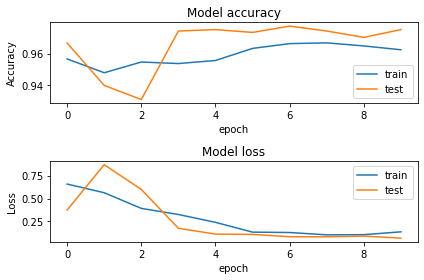

In [ ]:
evaluate_model(head_model,hist)

In [ ]:
#End

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Sample datasets images
image_dog=cv2.imread(test_path + "/dogs/dog.9.jpg")
cv2_imshow(image_dog)
image_cat=cv2.imread(test_path +"/cats/cat.9.jpg")
cv2_imshow(image_cat)

#//print(image_dog)
plt.imshow(image_dog)
plt.show()
plt.imshow(image_cat)
plt.show()


In [ ]:
#Load Model and load Model
from tensorflow.keras.models import model_from_json
json_file = open(base_path + "model_Resnet.json", 'r')
loaded_model_json = json_file.read()
json_file.close()

pmodel = model_from_json(loaded_model_json)
pmodel.load_weights(base_path + "model_Resnet_lastweight.h5")
pmodel.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
pmodel.summary()

In [ ]:
import tensorflow as tf
dim = (224, 224)

image_path=test_path + "/dogs/dog.9.jpg"

image = tf.keras.preprocessing.image.load_img(image_path,target_size=dim)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
print('Original Dimensions : ',input_arr.shape)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = pmodel.predict(input_arr)

predictions

Original Dimensions :  (224, 224, 3)


array([[0.999987]], dtype=float32)

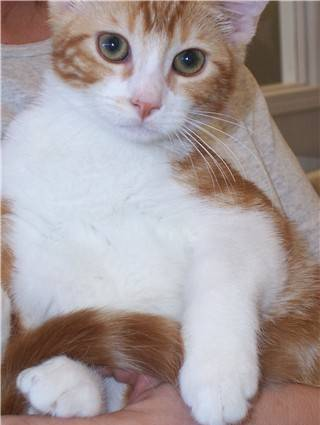

Original Dimensions :  (224, 224, 3)
[[1.388985e-11]]


In [ ]:
image_cat=cv2.imread(test_path +"/cats/cat.9.jpg")
cv2_imshow(image_cat)
image_path=test_path + "/cats/cat.9.jpg"

image = tf.keras.preprocessing.image.load_img(image_path,target_size=dim)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
print('Original Dimensions : ',input_arr.shape)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = pmodel.predict(input_arr)

print(predictions)

In [ ]:
if (predictions > 0.5):
  print("Dog")
else:
  print("Cat")

Cat


In [ ]:
ls -l model*

ls: cannot access 'model*': No such file or directory


In [ ]:
mv model_Resnet_lastweight.h5 ./working/